In [6]:
from google.colab import files
files.upload()  # This will open a file upload dialog

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dharineeshs","key":"aca3ddda714e041b97e603fc97418412"}'}

In [7]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)


In [8]:
import shutil
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")


'/root/.kaggle/kaggle.json'

In [9]:
os.chmod("/root/.kaggle/kaggle.json", 600)


In [10]:
!pip install -q kaggle


In [11]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:36<00:00, 20.0MB/s]
100% 2.29G/2.29G [00:36<00:00, 67.3MB/s]


In [12]:
!unzip chest-xray-pneumonia.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0445-0001.jpeg  


In [13]:
!ls /content/chest_xray


chest_xray  __MACOSX  test  train  val


In [14]:
import os
train_dir = '/content/chest_xray/train'
print(os.listdir(train_dir))


['PNEUMONIA', 'NORMAL']


In [15]:
import os

base_dir = '/content/chest_xray'
print(os.listdir(base_dir))  # Should show ['train', 'test', 'val']
print(os.listdir(os.path.join(base_dir, 'train')))  # Should show ['NORMAL', 'PNEUMONIA']


['__MACOSX', 'chest_xray', 'test', 'val', 'train']
['PNEUMONIA', 'NORMAL']


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [17]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Directories
train_dir = '/content/chest_xray/train'
val_dir = '/content/chest_xray/val'
test_dir = '/content/chest_xray/test'

# Function to load images and labels
def load_data(directory, target_size=(150, 150)):
    images, labels = [], []
    for label, folder in enumerate(['NORMAL', 'PNEUMONIA']):
        path = os.path.join(directory, folder)
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img)/255.0
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load datasets
X_train, y_train = load_data(train_dir)
X_val, y_val = load_data(val_dir)
X_test, y_test = load_data(test_dir)

print(X_train.shape, y_train.shape)


(5216, 150, 150, 3) (5216,)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Simple CNN
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.8376 - loss: 0.4069 - val_accuracy: 0.6875 - val_loss: 0.9387
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.9477 - loss: 0.1439 - val_accuracy: 0.9375 - val_loss: 0.1523
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.9628 - loss: 0.1023 - val_accuracy: 0.7500 - val_loss: 0.6645
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.9741 - loss: 0.0727 - val_accuracy: 0.8750 - val_loss: 0.1622
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.9727 - loss: 0.0703 - val_accuracy: 0.8125 - val_loss: 0.2893
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.9803 - loss: 0.0537 - val_accuracy: 1.0000 - val_loss: 0.0720
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9816 - loss: 0.0485 - val_accuracy: 0.9375 - val_loss: 0.1168
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.9847 - loss: 0.0448 - val_accu

In [19]:
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {test_acc*100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 366ms/step - accuracy: 0.4875 - loss: 4.0141
CNN Test Accuracy: 71.96%


In [20]:
for i, layer in enumerate(cnn_model.layers):
    print(i, layer.name, layer.__class__.__name__)

0 conv2d Conv2D
1 max_pooling2d MaxPooling2D
2 conv2d_1 Conv2D
3 max_pooling2d_1 MaxPooling2D
4 conv2d_2 Conv2D
5 max_pooling2d_2 MaxPooling2D
6 flatten Flatten
7 dense_2 Dense
8 dropout_1 Dropout
9 dense_3 Dense


In [21]:
# Make sure the model is built
cnn_model.build((None, 150, 150, 3))
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,485,445 (55.26 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,656,964 (36.84 MB)

In [22]:
# Example
cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=32)

163/163 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.9923 - loss: 0.0212 - val_accuracy: 1.0000 - val_loss: 0.0707


In [23]:
def get_gradcam(model, img_array):
    # Find last Conv2D layer automatically
    for layer in reversed(model.layers):
        if 'conv' in layer.name:
            last_conv_layer = layer.name
            break

    grad_model = tf.keras.models.Model([model.inputs],
                                       [model.get_layer(last_conv_layer).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap.numpy()


In [24]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

inputs = Input(shape=(150, 150, 3))
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(128, (3,3), activation='relu')(x)
x = MaxPooling2D(2,2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

cnn_model = Model(inputs=inputs, outputs=outputs)
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [25]:
cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.8403 - loss: 0.3754 - val_accuracy: 0.6875 - val_loss: 0.5833
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.9519 - loss: 0.1301 - val_accuracy: 0.9375 - val_loss: 0.2065
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.9671 - loss: 0.0873 - val_accuracy: 1.0000 - val_loss: 0.1021
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.9759 - loss: 0.0700 - val_accuracy: 0.8750 - val_loss: 0.2293
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.9752 - loss: 0.0660 - val_accuracy: 0.7500 - val_loss: 0.4915
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.9782 - loss: 0.0548 - val_accuracy: 1.0000 - val_loss: 0.0978
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.9825 - loss: 0.0482 - val_accuracy: 0.6875 - val_loss: 0.7928
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.9862 - loss: 0.0463 - val_accu

In [26]:
import tensorflow as tf
import numpy as np

def get_gradcam(model, img_array):
    # Automatically pick last Conv2D layer
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            last_conv_layer = layer.name
            break

    grad_model = tf.keras.models.Model(model.inputs,
                                   [model.get_layer(last_conv_layer).output, model.output])


    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap  # instead of heatmap.numpy()



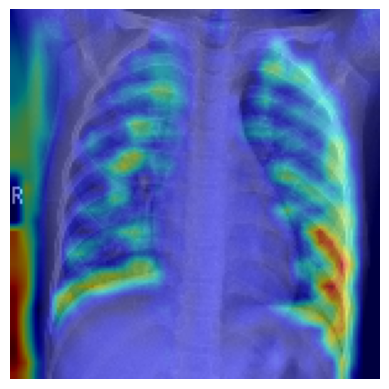

In [27]:
import matplotlib.pyplot as plt
import cv2

img = tf.convert_to_tensor(X_test[0][np.newaxis, ...], dtype=tf.float32)

heatmap = get_gradcam(cnn_model, img)

plt.imshow(X_test[0])
plt.imshow(cv2.resize(heatmap, (150,150)), cmap='jet', alpha=0.5)
plt.axis('off')
plt.show()


In [28]:
import numpy as np

def predict_proba_cnn(images):
    """
    CNN outputs sigmoid (0-1). LIME expects 2-class probabilities.
    Returns shape (num_samples, 2): [Normal, Pneumonia]
    """
    probs = cnn_model.predict(images)
    probs_2class = np.zeros((probs.shape[0], 2))
    probs_2class[:, 0] = 1 - probs[:, 0]  # Normal
    probs_2class[:, 1] = probs[:, 0]      # Pneumonia
    return probs_2class


In [29]:
img = X_test[0]  # shape (150, 150, 3)
pred_label = np.argmax(predict_proba_cnn(img[np.newaxis, ...]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=66ca03db09bea6f901d1075635be181923b727717aacb4c4f189908d5344abe6
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

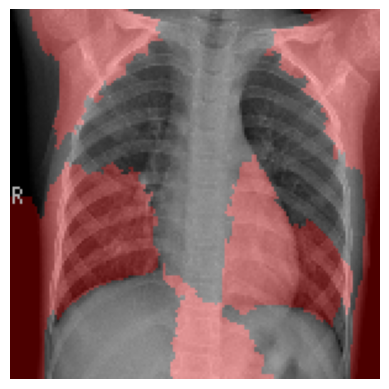

In [36]:
!pip install lime

from lime import lime_image
from skimage.color import label2rgb

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(
    img.astype('double'),
    classifier_fn=predict_proba_cnn,
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

# Get image and mask
temp, mask = explanation.get_image_and_mask(
    label=pred_label,
    positive_only=True,
    num_features=10,
    hide_rest=False
)

img_boundry = label2rgb(mask, img, bg_label=0)
import matplotlib.pyplot as plt
plt.imshow(img_boundry)
plt.axis('off')
plt.show()


In [37]:
import cv2

# Grad-CAM
gradcam_overlay = cv2.resize(heatmap, (150,150))
cv2.imwrite("gradcam_overlay.png", (gradcam_overlay * 255).astype(np.uint8))

# LIME
plt.imsave("lime_explanation.png", img_boundry)


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (cnn_model.predict(X_test) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Normal','Pneumonia']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 413ms/step
[[ 50 184]
 [  1 389]]
              precision    recall  f1-score   support

      Normal       0.98      0.21      0.35       234
   Pneumonia       0.68      1.00      0.81       390

    accuracy                           0.70       624
   macro avg       0.83      0.61      0.58       624
weighted avg       0.79      0.70      0.64       624



20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 432ms/step


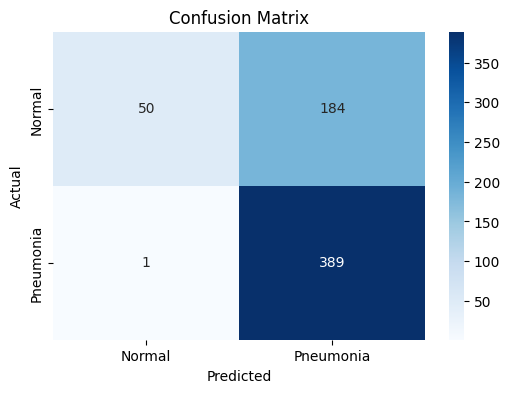

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
y_pred = (cnn_model.predict(X_test) > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Normal', 'Pneumonia'],
            yticklabels=['Normal', 'Pneumonia'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [42]:
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.9906 - loss: 0.0321 - val_accuracy: 0.9375 - val_loss: 0.1217
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.9934 - loss: 0.0164 - val_accuracy: 0.9375 - val_loss: 0.1929
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.9974 - loss: 0.0097 - val_accuracy: 0.9375 - val_loss: 0.1632
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.9937 - loss: 0.0132 - val_accuracy: 0.9375 - val_loss: 0.0637
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.9955 - loss: 0.0132 - val_accuracy: 0.8750 - val_loss: 0.5314
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.9975 - loss: 0.0067 - val_accuracy: 0.9375 - val_loss: 0.2780
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.9959 - loss: 0.0083 - val_accuracy: 0.9375 - val_loss: 0.2865
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.9926 - loss: 0.0222 - val_accu

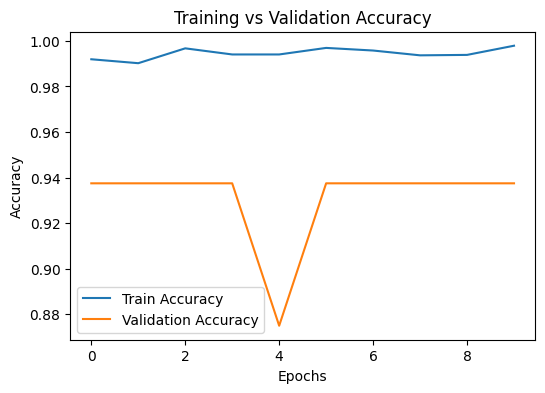

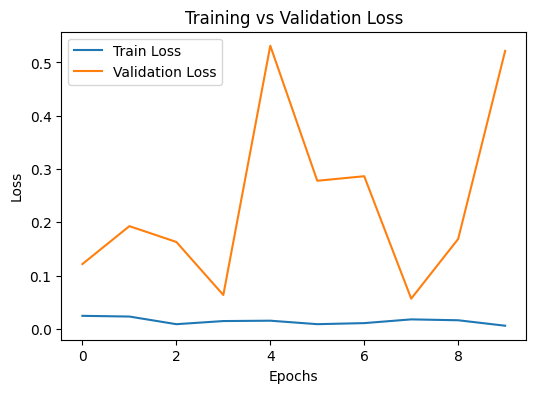

In [43]:
# Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [45]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# 1) Get validation probabilities once (no training)
val_probs = model.predict(X_val, verbose=0).ravel()

# 2) Search for the best threshold for accuracy on VAL
thresholds = np.linspace(0.1, 0.9, 81)
best_thr, best_acc = 0.5, 0
for t in thresholds:
    val_pred = (val_probs >= t).astype(int)
    acc = accuracy_score(y_val, val_pred)
    if acc > best_acc:
        best_acc, best_thr = acc, t

print(f"Best threshold on VAL: {best_thr:.3f}  |  Val accuracy: {best_acc:.4f}")

# 3) Apply this threshold on TEST
test_probs = model.predict(X_test, verbose=0).ravel()
y_pred_thr = (test_probs >= best_thr).astype(int)
cm = confusion_matrix(y_test, y_pred_thr)
acc = accuracy_score(y_test, y_pred_thr)
print(f"Test accuracy @ {best_thr:.3f}: {acc:.4f}")
print(cm)


Best threshold on VAL: 0.710  |  Val accuracy: 0.9375
Test accuracy @ 0.710: 0.8638
[[175  59]
 [ 26 364]]


In [50]:
import tensorflow as tf
import numpy as np

def tta_batch_predict(model, X, rotations_deg=(0, 10, -10), hflip=True):
    preds = []

    # Original
    preds.append(model.predict(X, verbose=0).ravel())

    # Horizontal flip (reasonable for CXR)
    if hflip:
        X_h = tf.image.flip_left_right(X).numpy()
        preds.append(model.predict(X_h, verbose=0).ravel())

    # Small rotations
    for deg in rotations_deg:
        if deg == 0:
            continue
        from scipy.ndimage import rotate

def rotate_batch(X, degrees):
    X_rot = []
    for img in X:
        img_r = rotate(img, degrees, reshape=False, mode='nearest')
        X_rot.append(img_r)
    return np.array(X_rot)

def tta_batch_predict(model, X, rotations_deg=(10, -10), hflip=True):
    preds = []
    # Original
    preds.append(model.predict(X, verbose=0).ravel())
    # Horizontal flip
    if hflip:
        X_h = tf.image.flip_left_right(X).numpy()
        preds.append(model.predict(X_h, verbose=0).ravel())
    # Rotations (using scipy)
    for deg in rotations_deg:
        X_r = rotate_batch(X, deg)
        preds.append(model.predict(X_r, verbose=0).ravel())
    # Average predictions
    return np.mean(np.stack(preds, axis=0), axis=0)


TTA best threshold on VAL: 0.690 | Val acc: 0.9375
Test acc (TTA): 0.8638
Confusion Matrix (values):
 [[168  66]
 [ 19 371]]


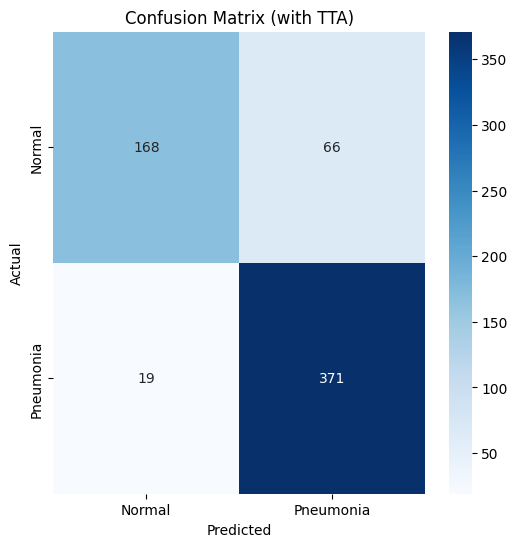

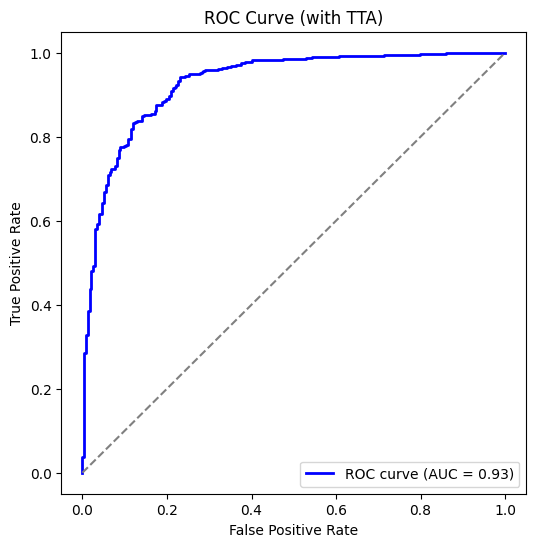

In [54]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import rotate

# ----------------------------
# Rotation helper (using SciPy)
# ----------------------------
def rotate_batch(X, degrees):
    X_rot = []
    for img in X:
        img_r = rotate(img, degrees, reshape=False, mode='nearest')
        X_rot.append(img_r)
    return np.array(X_rot)

# ----------------------------
# TTA prediction function
# ----------------------------
def tta_batch_predict(model, X, rotations_deg=(10, -10), hflip=True):
    preds = []
    # original
    preds.append(model.predict(X, verbose=0).ravel())
    # horizontal flip
    if hflip:
        X_h = tf.image.flip_left_right(X).numpy()
        preds.append(model.predict(X_h, verbose=0).ravel())
    # rotations
    for deg in rotations_deg:
        X_r = rotate_batch(X, deg)
        preds.append(model.predict(X_r, verbose=0).ravel())
    # average predictions
    return np.mean(np.stack(preds, axis=0), axis=0)

# ----------------------------
# Step 1: Run TTA on val + test
# ----------------------------
val_probs_tta = tta_batch_predict(model, X_val)
test_probs_tta = tta_batch_predict(model, X_test)

# ----------------------------
# Step 2: Threshold tuning
# ----------------------------
thresholds = np.linspace(0.1, 0.9, 81)
best_thr, best_acc = 0.5, 0
for t in thresholds:
    val_pred = (val_probs_tta >= t).astype(int)
    acc = accuracy_score(y_val, val_pred)
    if acc > best_acc:
        best_acc, best_thr = acc, t

print(f"TTA best threshold on VAL: {best_thr:.3f} | Val acc: {best_acc:.4f}")

# ----------------------------
# Step 3: Final Test Evaluation
# ----------------------------
y_pred_tta = (test_probs_tta >= best_thr).astype(int)
test_acc = accuracy_score(y_test, y_pred_tta)
print(f"Test acc (TTA): {test_acc:.4f}")
print("Confusion Matrix (values):\n", confusion_matrix(y_test, y_pred_tta))

# ----------------------------
# Step 4: Confusion Matrix Heatmap
# ----------------------------
cm = confusion_matrix(y_test, y_pred_tta)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Pneumonia"],
            yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (with TTA)")
plt.show()

# ----------------------------
# Step 5: ROC Curve
# ----------------------------
fpr, tpr, thresholds = roc_curve(y_test, test_probs_tta)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (with TTA)")
plt.legend(loc="lower right")
plt.show()


In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
test_acc = accuracy_score(y_test, y_pred_tta)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Classification report (Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tta, target_names=["Normal", "Pneumonia"]))

# Confusion matrix (numbers only)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tta))


Test Accuracy: 86.38%

Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.72      0.80       234
   Pneumonia       0.85      0.95      0.90       390

    accuracy                           0.86       624
   macro avg       0.87      0.83      0.85       624
weighted avg       0.87      0.86      0.86       624


Confusion Matrix:
[[168  66]
 [ 19 371]]
